In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [20]:
from keras.datasets import mnist

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=20)

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
X_test.shape

(5000, 28, 28)

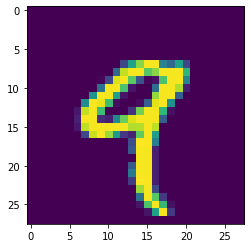

Label for the element 4 : 9


In [26]:
element = 4
plt.imshow(X_train[element])
plt.show()
print("Label for the element", element,":", y_train[element])

In [27]:
# it expects a vector and not a two-dimensional array
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))
X_val = X_val.reshape((-1, 28*28))
X_val.shape

(5000, 784)

In [28]:
#the value of each pixel – indicating the gray level of a given pixel – should be between 0  and 255
print(X_train.min(), "-", X_train.max())

0 - 255


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
print(X_train.min(), "-", X_train.max())

0.0 - 1.0


In [32]:
model = Sequential([
   Dense(256, activation='relu', input_shape=(784,)),
   Dense(128, activation='tanh'),   
   Dense(64, activation='relu'),
   Dense(10, activation='sigmoid')
])
model.compile(
   optimizer='Adam',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

In [33]:
history = model.fit(X_train,to_categorical(y_train),epochs=10, batch_size=64,validation_data=(X_val,to_categorical(y_val)))

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2489 - acc: 0.9279 - val_loss: 0.1451 - val_acc: 0.9568
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0906 - acc: 0.9724 - val_loss: 0.1291 - val_acc: 0.9616
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0624 - acc: 0.9801 - val_loss: 0.0935 - val_acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0461 - acc: 0.9854 - val_loss: 0.0991 - val_acc: 0.9742
Epoch 5/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0333 - acc: 0.9896 - val_loss: 0.1160 - val_acc: 0.9702
Epoch 6/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0307 - acc: 0.9898 - val_loss: 0.1290 - val_acc: 0.9708
Epoch 7/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0216 - acc: 0.9931 - val_loss:

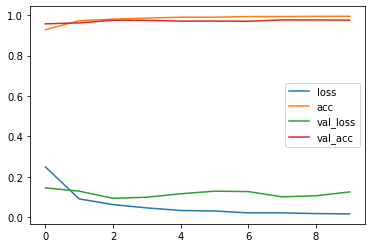

In [34]:
pd.DataFrame(history.history).plot();

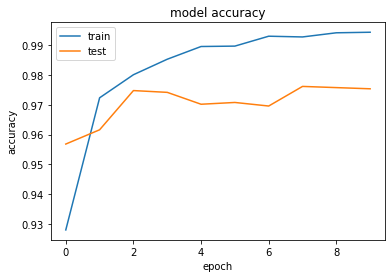

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

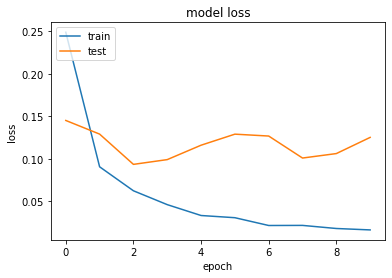

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()